<a href="https://colab.research.google.com/github/futurexskill/ai/blob/master/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Tweepy

An easy-to-use Python library for accessing the Twitter API

In [0]:
import tweepy

## Define variables for keys and tokens required for authorization

In [0]:
consumer_key='ySTUrA4LKm3u5ScyII7YM0war'
consumer_secret='5iCEhA1un8sXe6o84CRL6XPGjdb8SXBUdotsNeS2QOvxxI6WGq'
access_token ='1156204423539912704-A3GGCnfSTTgBvvjDmRaBD2IDexoFxk'
access_secret='SP6qu6fvn6I5KNlX45RIV8GT2NNjFQ3BfPlhxskPGhnA4'

## Define Auth variables with keys

In [0]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

## Define timeout 20 second

In [0]:
api = tweepy.API(auth,timeout=20)

## Define text for which you want to fetch the tweet

In [0]:
tweet_text = 'asteroid';


## Create an empty list to store tweets

In [0]:
tweets_list = []


## Fetch the tweet and store it in the list

In [0]:
for status in tweepy.Cursor(api.search,q=tweet_text,lang='en',result_type='recent').items(500):
        tweets_list.append(status.text)

TweepError: ignored

## Check how many tweets got fetched

In [0]:
len(tweets_list)

500

## Check sample tweets

In [0]:
tweets_list[3]

'@bourbonface All of those "Giant Asteroid 2020" t-shirts seem way too real now.'

In [0]:
tweets_list[80]

'1 big thing: The future of asteroid tracking https://t.co/hsubYa7orT #axiosspace'

## Clean the tweets with Regular Expression

In [0]:
import re

In [0]:
for i in range(len(tweets_list)):
  # get each tweet
  tweet = tweets_list[i]
  tweet = tweet.lower()
  # remove junk characters 
  tweet = re.sub(r'\W',' ',tweet)
  # remove one or more space
  tweet = re.sub(r'\s+',' ',tweet)
  # Remove all characters except a to z or A to Z and replace them with a space
  tweet = re.sub('[^a-zA-Z]',' ',tweet)
  # store the clean tweet back in the list
  tweets_list[i] = tweet


## Check sample tweets after cleaning

In [0]:
tweets_list[3]

' bourbonface all of those giant asteroid t shirts seem way too real now '

In [0]:
tweets_list[80]

' big thing the future of asteroid tracking https t co hsubya ort axiosspace'

## Load the Classifier and TF IDF vectorizer from pickle files

In [0]:
import pickle

In [0]:
with open('classifier.pickle','rb') as file:
    classifier = pickle.load(file)

In [0]:
with open('tfidfmodel.pickle','rb') as file:
    tfidf = pickle.load(file)

## Define variables for storing count for each sentiment type

In [0]:
positive_tweet = 0
negative_tweet = 0

## For each tweet predict sentiment and increment sentiment counter

In [0]:
for tweet in tweets_list:
  sentiment = classifier.predict(tfidf.transform([tweet]).toarray())
  if sentiment[0] == 1:
    positive_tweet += 1
  else:
    negative_tweet += 1

## Check how many positive and negative tweets are there

In [0]:
positive_tweet

72

In [0]:
negative_tweet

428

## Create a bar chart to display sentiment count

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
sentiment_type = ('Positive', 'Negative')


In [0]:
y_pos = np.arange(len(sentiment_type))


In [0]:
sentiment_count = [positive_tweet,negative_tweet]

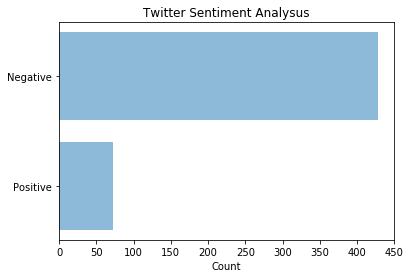

In [0]:
plt.barh(y_pos, sentiment_count, align='center', alpha=0.5)
plt.yticks(y_pos, sentiment_type)
plt.xlabel('Count')
plt.title('Twitter Sentiment Analysus')
plt.show()